<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{0.01}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

IMPORTANTE
=====

Hicimos la suposicion de que la funcion esta mal, ya que como esta escrita es una lineal y por ende la f.d.a daria cuadratica y su area seria mayor de 1.

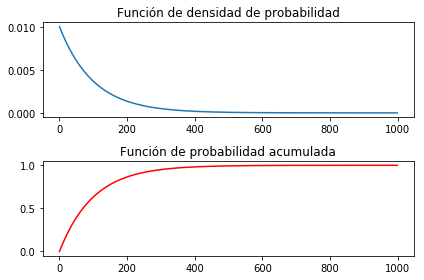

In [71]:
%matplotlib inline
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def exp_distr(x):
    return (0.01*np.exp(-0.01*x))

def fda(x):
    return quad(exp_distr,0,x)[0]

a = [i for i in range(1000)]
b = [exp_distr(x) for x in a]
c = [fda(x) for x in a]
plt.subplot(211)
plt.plot(a,b)
plt.title('Función de densidad de probabilidad')
plt.subplot(212)
plt.plot(a,c,'r')
plt.title('Función de probabilidad acumulada')
plt.tight_layout()


In [72]:
prob_50_150 = fda(150)-fda(50)
print ("La probabilidad que dure entre 50 y 150 horas es " +str(prob_50_150)) 

La probabilidad que dure entre 50 y 150 horas es 0.38340049956420347


In [78]:
prob_100 = fda(100)
print("La probabilidad que dure menos de 100 horas es " + str(prob_100))

La probabilidad que dure menos de 100 horas es 0.6321205588285578


## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [34]:


# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-20,30)

In [35]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.065759
std        5.046351
min      -18.640910
25%       -3.503830
50%       -0.103445
75%        3.394935
max       20.526092


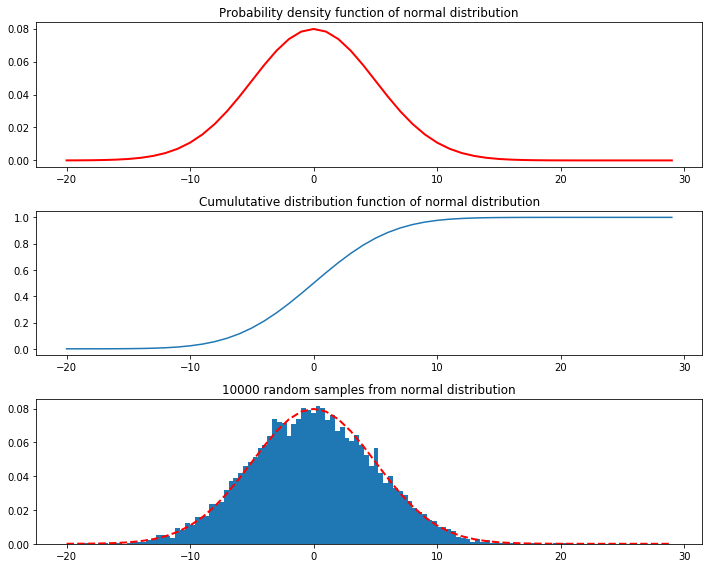

In [11]:
graphic_normal(mu, sigma, rng)

Sample descriptive statistics:
                  0
count  10000.000000
mean      29.989081
std        5.081769
min        9.856666
25%       26.634973
50%       29.902506
75%       33.439816
max       49.073126


/home/mauricio/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


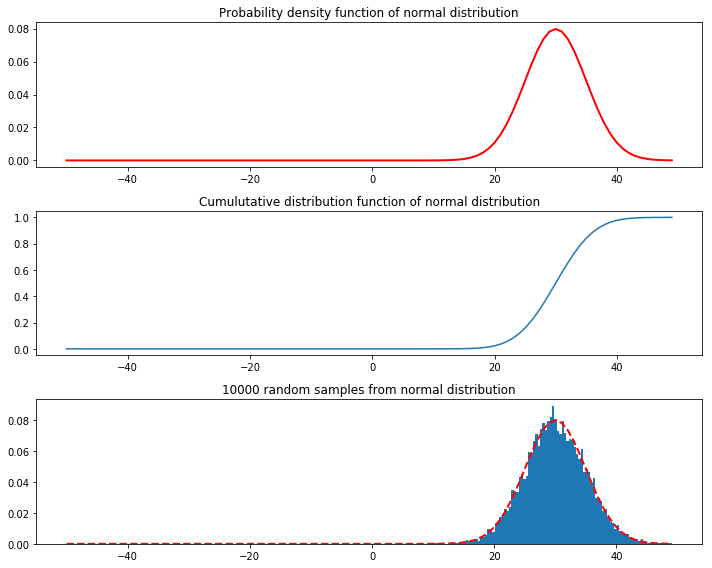

In [42]:
mu = 30
sigma = 5
rng = range(-50,50)
graphic_normal(mu, sigma, rng)

Sample descriptive statistics:
                  0
count  10000.000000
mean       0.084909
std       19.944644
min      -78.882081
25%      -13.167017
50%        0.086028
75%       13.484342
max       77.291372


/home/mauricio/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


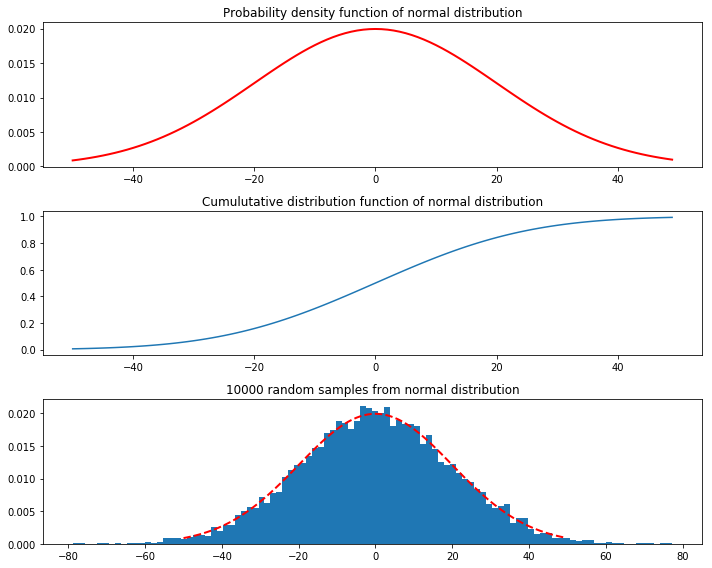

In [46]:
mu = 0
sigma = 20
rng = range(-50,50)
graphic_normal(mu, sigma, rng)

Sample descriptive statistics:
                  0
count  10000.000000
mean      -2.995482
std        2.007093
min      -10.389206
25%       -4.342973
50%       -2.966610
75%       -1.650954
max        4.287212


/home/mauricio/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


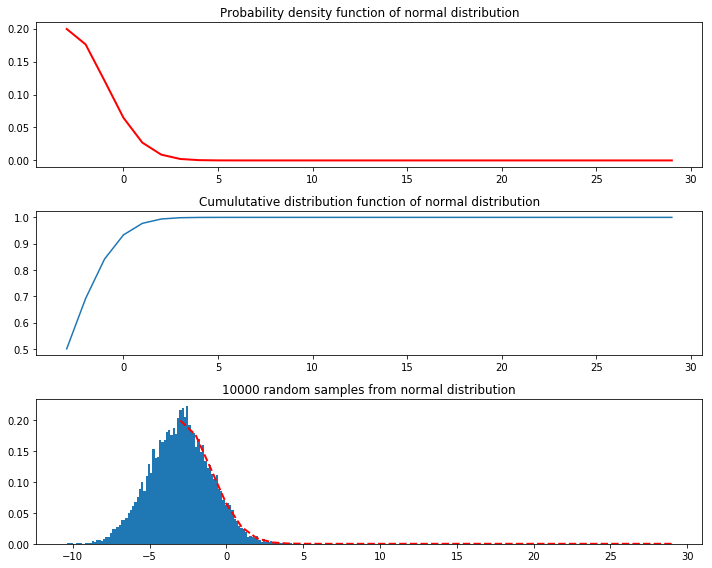

In [53]:
mu = -3
sigma = 2
rng = range(-3,30)
graphic_normal(mu,sigma,rng)

La relación que tienen mu, sigma y el rango con respecto al gráfico de de campana gausseana es el siguiente:

mu indica el eje de simetria de la campana, y es el valor de la media de la misma, por eso, si corremos mu, toda la campana se mueve con ella.

sigma esta asociada con la desviación estandar de la distribución y en el gráfico se puede apreciar como el "ancho" de la campana, midiendo este ancho desde los puntos de inflexión de la misma.

Y por último el rango lo unico que nos marca es que rango de valores estaremos viendo de la campana, cabe recordar que el dominio de una campana gausseana son todos los reales, por eso necesitamos establecerlo. En el último gráfico se puede apreciar que con el rango podriamos tomar solo una cola de la gausseana si asi nos interesara.

Resumiendo si mu es un valor positivo veremos un corrimiento hacia la derecha de todo el gráfico y con un valor negativo un corrimiento hacia la izquierda. 
Con sigmas grandes veremos campanas muy anchas y bajas, ya que el area total siempre debe ser 1, en cambio con sigmas bajos veremos campanas muy "puntiagudas", lo que indica que tan dispersos estan los datos alrededor de mu (mucho en los casos de sigma grandes, poco en los casos de sigmas chicos).
Y con el rango solo estaremos viendo distintas partes de la campana.
